c:\Users\Mark\anaconda3\envs\CALenv\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


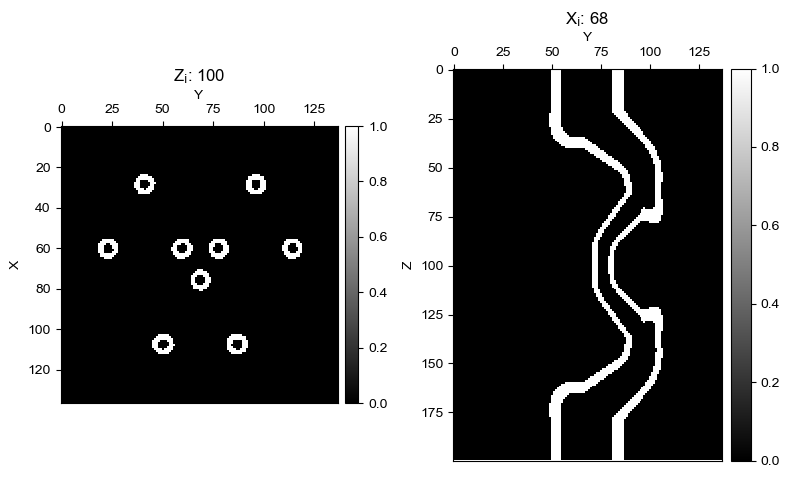

In [1]:
import vamtoolbox as vam
import numpy as np

targetgeo = vam.geometry.TargetGeometry(stlfilename=vam.resources.load("trifurcatedvasculature.stl"), resolution = 200)
targetgeo.show()

In [2]:
num_angles = 360

angles = np.linspace(0, 360 - 360/num_angles, num_angles)

proj_geo = vam.geometry.ProjectionGeometry(angles, ray_type='parallel', CUDA=True)


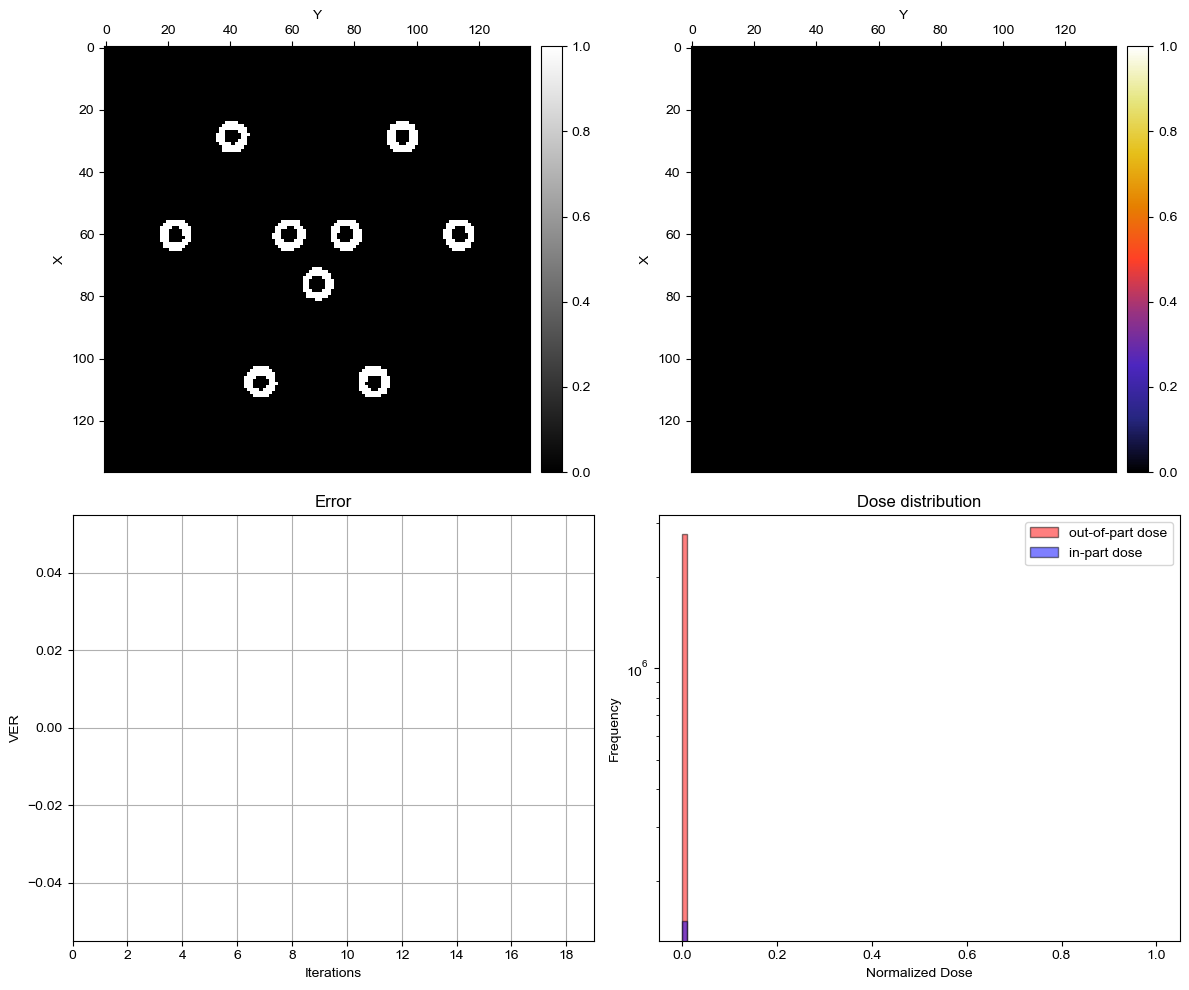

c:\Users\Mark\anaconda3\envs\CALenv\lib\site-packages\vamtoolbox\util\data.py:116: ComplexWarning: Casting complex values to real discards the imaginary part
  return x_filtered.astype(float)


Iteration    1 at time:    5.6 s
Iteration    2 at time:   10.4 s
Iteration    3 at time:   15.5 s
Iteration    4 at time:   20.2 s
Iteration    5 at time:   24.4 s
Iteration    6 at time:   28.9 s
Iteration    7 at time:   33.4 s
Iteration    8 at time:   37.7 s
Iteration    9 at time:   42.3 s
Iteration   10 at time:   46.8 s
Iteration   11 at time:   51.3 s
Iteration   12 at time:   56.0 s
Iteration   13 at time:   60.4 s
Iteration   14 at time:   64.9 s
Iteration   15 at time:   69.4 s
Iteration   16 at time:   73.5 s
Iteration   17 at time:   77.5 s
Iteration   18 at time:   82.0 s
Iteration   19 at time:   86.3 s
Iteration   19 at time:   86.3 s


In [3]:
optimizer_params = vam.optimize.Options(method='OSMO', n_iter=20, d_h = 0.85, d_l = 0.6, filter='hamming', verbose='plot')

opt_sino, opt_recon, error = vam.optimize.optimize(targetgeo, proj_geo, optimizer_params)



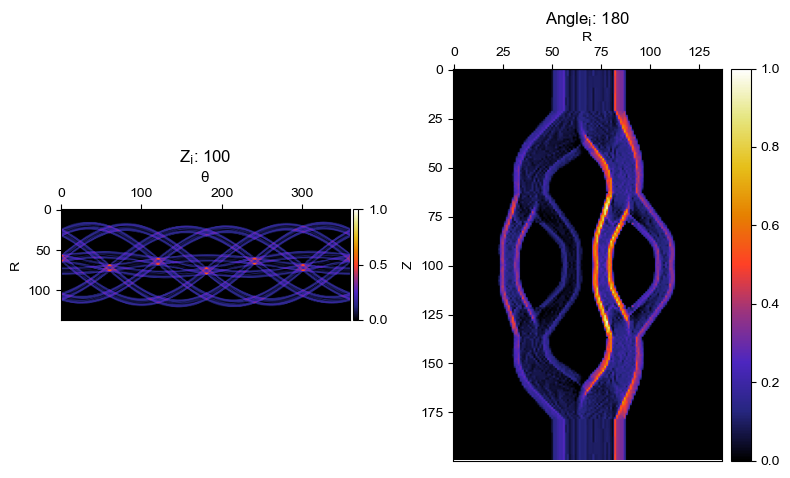

In [4]:
opt_sino.show()

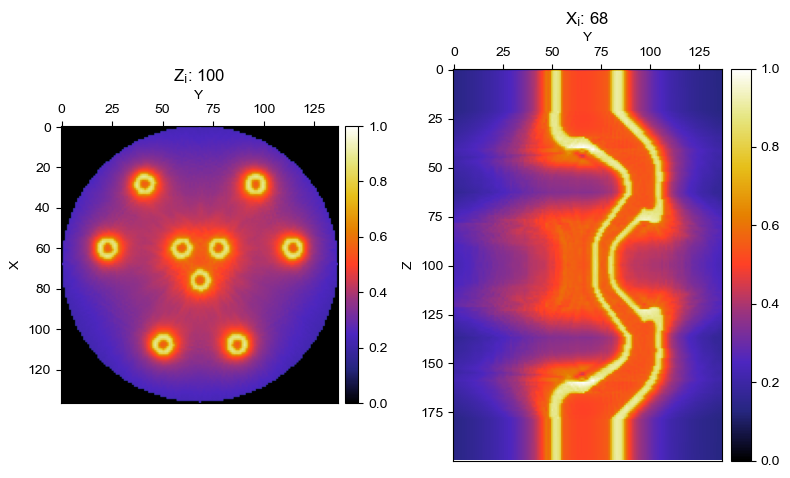

In [5]:
opt_recon.show()

In [6]:
import vedo
import vedo.applications

vol = vedo.Volume(opt_recon.array, mode=0)
vedo.applications.RayCastPlotter(vol, bg='black').show(viewup="x")